Experiment 1: Education as a Countermeasure

group / group_intervention:

        P / 0: Purple group (Purple as warning)

        O / 1: Orange group (Orange as a warning)

    pattern / pattern_bright:

        "deceptive" / 0: Cookie banner with unequal paths (deceptive pattern)

        "bright" / 1: Cookie banner with equal paths (non-deceptive pattern)

    group_x_pattern: Combined condition for interaction analysis.

🧠 Participant Behavior

    result: Response to cookie consent banner (accept, reject, settings-drop)

    accepted: Binary — 1 for accept, 0 for reject

👁️ Eye-Tracking Measures

    time_to_first_fixation: Time until participant first fixates on banner

    time_first_fixation_to_click: Time between first fixation and click

    duration_fixation_cookie: Total time fixated on banner

    duration_fixation_accept: Time fixated on accept button

    duration_fixation_reject: Time fixated on reject button

    num_fixations_cookie: Number of fixations on banner


🧍 Participant-level Data

    user_id: Participant identifier

    privacy_attitude: Privacy attitude score (same value per user across trials 1-7 scale)

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, read_excel
import pandas as pd
import os

# Load the data from the "eye_data2" sheet
root_path = "./"
file_name = "eye_data2"
dataset_path = os.path.join(root_path, "{}.xlsx".format(file_name))
df = pd.read_excel(dataset_path)
# Display basic info and preview
df_info = df.info()
df_preview = df.head()

df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            395 non-null    int64  
 1   group                              395 non-null    object 
 2   group_O                            395 non-null    int64  
 3   pattern                            395 non-null    object 
 4   pattern_bright                     395 non-null    int64  
 5   website                            395 non-null    object 
 6   trial_order                        395 non-null    int64  
 7   time_to_first_fixation             384 non-null    float64
 8   time_from_first_fixation_to_click  383 non-null    float64
 9   time of appearance                 391 non-null    float64
 10  result                             395 non-null    object 
 11  accepted                           395 non-null    int64  

In [ ]:
## Count number of trials per user
user_counts = df['user_id'].value_counts()

# Identify users with fewer than 8 samples
low_sample_users = user_counts[user_counts < 10]

# Filter out these users from the dataset
df_filtered = df[~df['user_id'].isin(low_sample_users.index)]

# Display the users who were removed and how many samples they had
removed_users = low_sample_users.reset_index()
removed_users.columns = ['user_id', 'num_samples']

removed_users

,user_id,num_samples


In [ ]:
# Drop rows where user_id is 405
df_filtered = df[df['user_id'] != 405].copy()

# Confirm the participant has been removed
participant_dropped = 405 not in df_filtered['user_id'].unique()

df_filtered.shape, participant_dropped

# Drop rows with missing values in key timing columns
time_columns = [
    "time_to_first_fixation",
    "time_from_first_fixation_to_click",
    "time of appearance"
]

df_filtered = df_filtered.dropna(subset=time_columns)

# Report new shape
df_filtered.shape

(370, 18)

In [ ]:
# Filter only rows where result is "accept" or "reject"
df_filtered = df_filtered[df_filtered["result"].isin(["accept", "reject"])].copy()

# Report the new shape
df_filtered.shape

(335, 20)

In [ ]:
!pip install bambi[arviz]

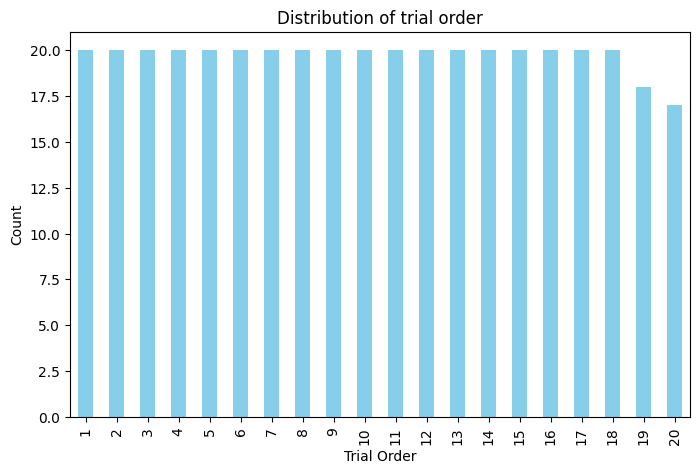

In [ ]:
# Trial order distribution
plt.figure(figsize=(8, 5))
df_filtered['trial_order'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Distribution of trial order")
plt.xlabel("Trial Order")
plt.ylabel("Count")
plt.show()

fixation duration on cookie consent

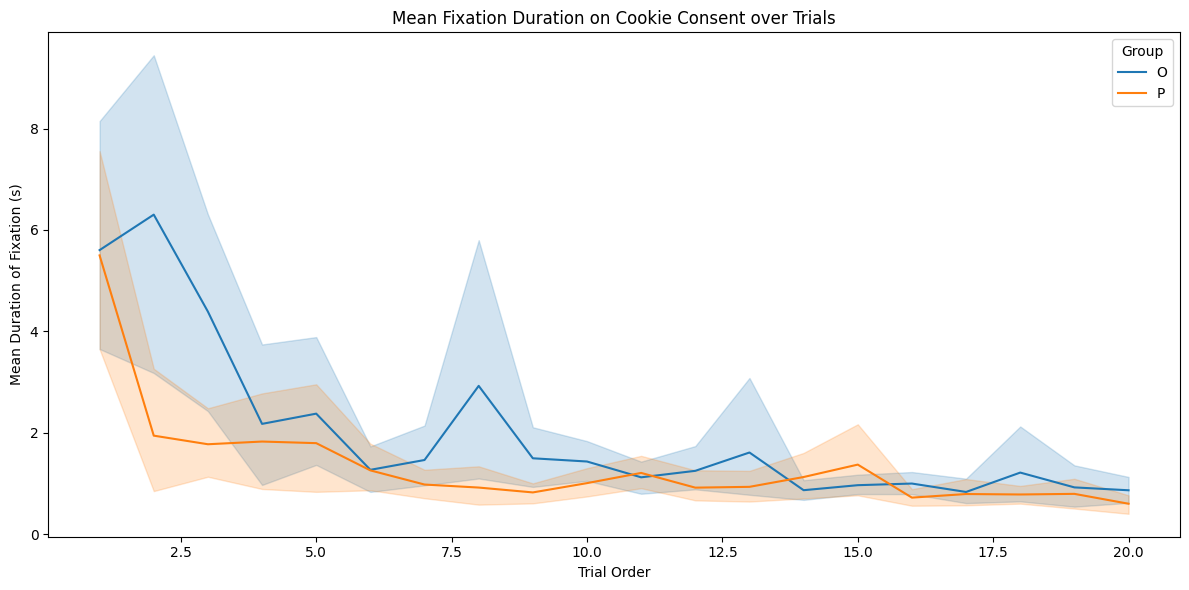

In [ ]:
# Plot: Lineplot of fixation time on cookie consent over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='trial_order', y='duration_fixation_cookie', hue='group', estimator='mean')
plt.title("Mean Fixation Duration on Cookie Consent over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Duration of Fixation (s)")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

<Axes: ylabel='duration_fixation_cookie'>

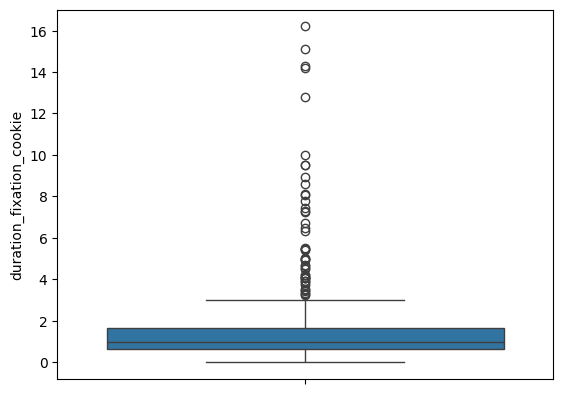

In [ ]:
sns.boxplot(df_filtered["duration_fixation_cookie"])

<Axes: xlabel='duration_fixation_cookie', ylabel='Count'>

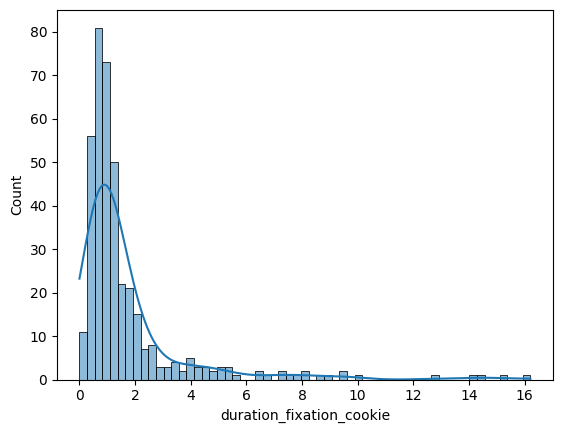

In [ ]:
sns.histplot(df_filtered["duration_fixation_cookie"], kde=True)

In [ ]:
# Import libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pandas as pd
import arviz as az

# Convert variables to categorical as needed
df_filtered["group_O"] = df_filtered["group_O"].astype("category")
df_filtered["pattern_bright"] = df_filtered["pattern_bright"].astype("category")
df_filtered["user_id"] = df_filtered["user_id"].astype("category")
df_filtered["trial_order"] = df_filtered["trial_order"].astype(int)
df_filtered = df_filtered.copy()
df_filtered = df_filtered[df_filtered["duration_fixation_cookie"] > 0]

# gamma, poisson, weibull
# Fit model
model_FD_cookie = bmb.Model(
    "duration_fixation_cookie ~ group_O + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_filtered,
    family="weibull"
)

results_FD_cookie = model_FD_cookie.fit(draws=2000,
    tune=2000,
    chains=4,
    target_accept=0.99)

In [ ]:
az.summary(results_FD_cookie)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|user_id[301],-0.403,0.220,-0.822,-0.005,0.004,0.002,3590.0,5142.0,1.0
1|user_id[302],0.023,0.215,-0.378,0.427,0.004,0.002,3374.0,4425.0,1.0
1|user_id[303],-0.356,0.228,-0.780,0.073,0.004,0.003,2994.0,4288.0,1.0
1|user_id[304],0.419,0.221,0.024,0.848,0.004,0.002,3183.0,5185.0,1.0
1|user_id[305],-0.099,0.377,-0.822,0.600,0.007,0.006,2581.0,3226.0,1.0
1|user_id[306],-0.533,0.229,-0.966,-0.113,0.004,0.002,3019.0,4717.0,1.0
1|user_id[307],0.726,0.226,0.296,1.140,0.004,0.002,3038.0,4788.0,1.0
1|user_id[308],0.413,0.230,-0.008,0.859,0.004,0.003,3027.0,4476.0,1.0
1|user_id[309],0.025,0.226,-0.383,0.464,0.004,0.003,2962.0,4669.0,1.0
1|user_id[310],-0.138,0.223,-0.562,0.273,0.004,0.002,3276.0,4887.0,1.0


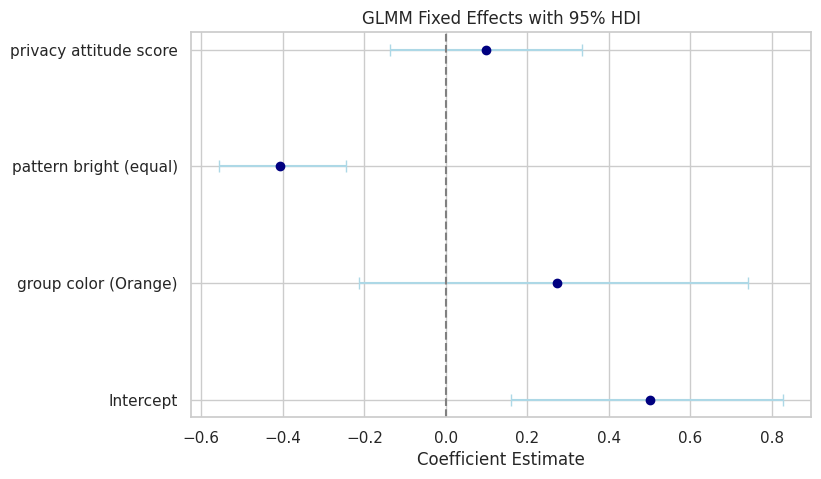

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group color (Orange)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [0.501, 0.273, -0.407, 0.098],
    "Lower": [0.160, -0.213, -0.556, -0.137],
    "Upper": [0.827, 0.742, -0.245, 0.333]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

number of fixation on cookie consent

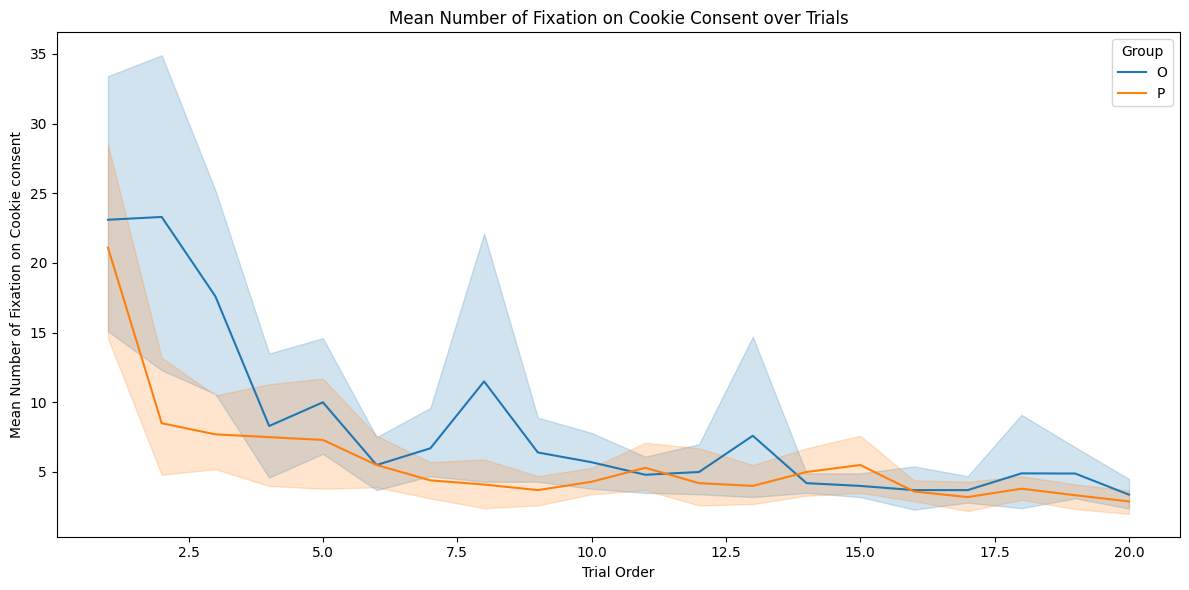

In [ ]:
# Plot: Lineplot of number of fixation on cookie consent over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='trial_order', y='num_fixation_cookie', hue='group', estimator='mean')
plt.title("Mean Number of Fixation on Cookie Consent over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Number of Fixation on Cookie consent")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

<Axes: ylabel='num_fixation_cookie'>

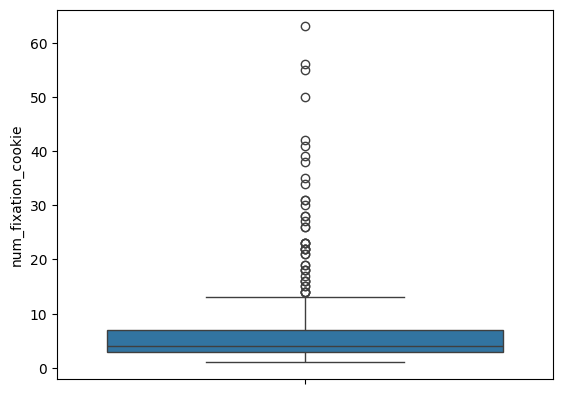

In [ ]:
sns.boxplot(df_filtered["num_fixation_cookie"])

<Axes: xlabel='num_fixation_cookie', ylabel='Count'>

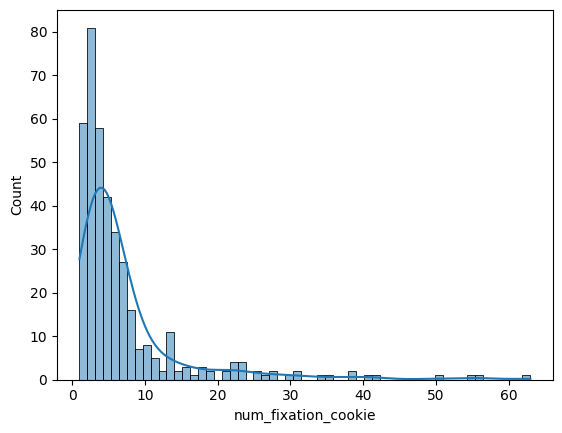

In [ ]:
sns.histplot(df_filtered["num_fixation_cookie"], kde=True)

In [ ]:
# Import libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pandas as pd
import arviz as az

# Convert variables to categorical as needed
df_filtered["group_O"] = df_filtered["group_O"].astype("category")
df_filtered["pattern_bright"] = df_filtered["pattern_bright"].astype("category")
df_filtered["user_id"] = df_filtered["user_id"].astype("category")

df_filtered["trial_order"] = df_filtered["trial_order"].astype(int)

# Fit model
model_n_cookie = bmb.Model(
    "num_fixation_cookie ~ group_O + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_filtered,
    family="poisson"
)

results_n_cookie = model_n_cookie.fit(draws=2000,
    tune=2000,
    chains=4,
    target_accept=0.99)

In [ ]:
az.summary(results_n_cookie)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|user_id[301],-0.342,0.170,-0.675,-0.038,0.004,0.002,2174.0,3551.0,1.0
1|user_id[302],0.074,0.161,-0.238,0.378,0.004,0.002,2009.0,2954.0,1.0
1|user_id[303],-0.368,0.175,-0.677,-0.016,0.004,0.002,2117.0,3007.0,1.0
1|user_id[304],0.301,0.160,0.000,0.613,0.004,0.002,1916.0,3092.0,1.0
1|user_id[305],-0.037,0.330,-0.669,0.581,0.006,0.005,2739.0,3303.0,1.0
1|user_id[306],-0.570,0.179,-0.909,-0.230,0.004,0.002,2480.0,4019.0,1.0
1|user_id[307],0.779,0.161,0.473,1.086,0.004,0.002,1880.0,3062.0,1.0
1|user_id[308],0.343,0.168,0.037,0.672,0.004,0.002,1982.0,3433.0,1.0
1|user_id[309],0.082,0.168,-0.233,0.401,0.004,0.002,1979.0,3008.0,1.0
1|user_id[310],-0.287,0.169,-0.608,0.019,0.004,0.002,2178.0,3712.0,1.0


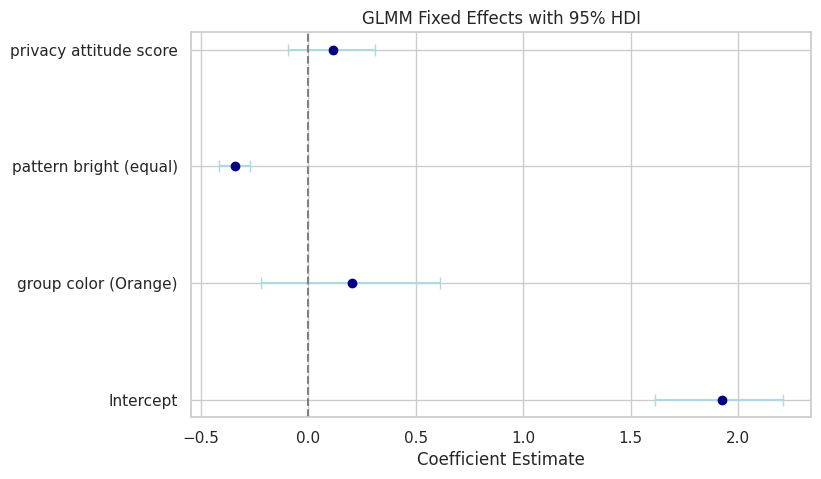

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group color (Orange)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [1.924, 0.205, -0.338, 0.114],
    "Lower": [1.611, -0.220, -0.413, -0.092],
    "Upper": [2.208, 0.613, -0.268, 0.310]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

decision time

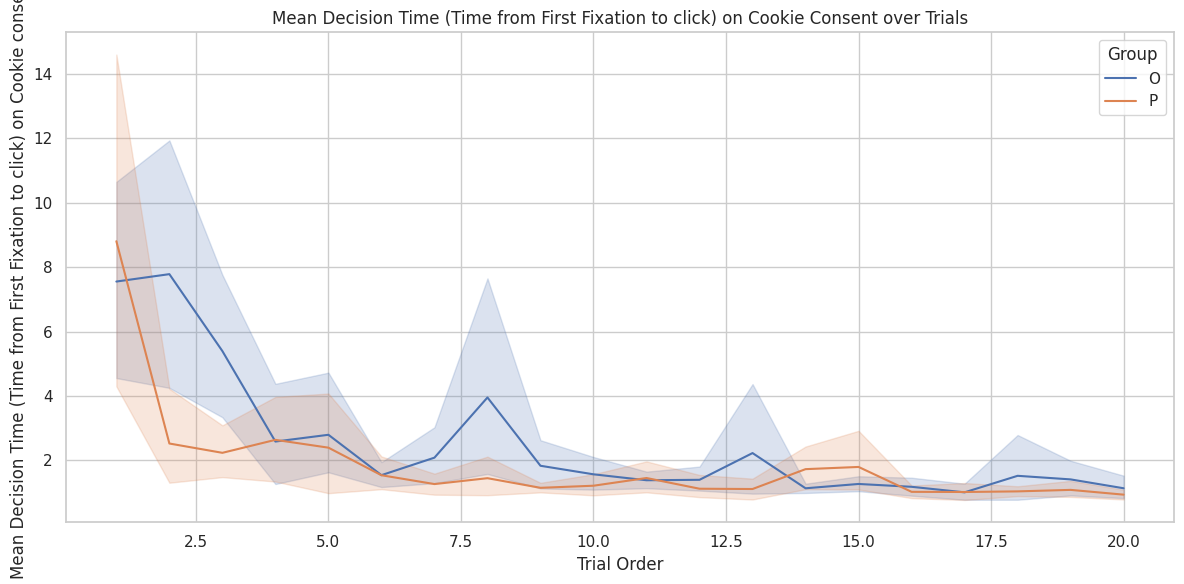

In [ ]:
# Plot: Lineplot of Time from First Fixation to click over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='trial_order', y='time_from_first_fixation_to_click', hue='group', estimator='mean')
plt.title("Mean Decision Time (Time from First Fixation to click) on Cookie Consent over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Decision Time (Time from First Fixation to click) on Cookie consent")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

<Axes: ylabel='time_from_first_fixation_to_click'>

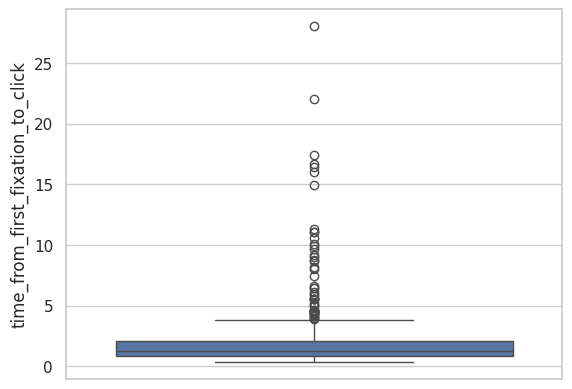

In [ ]:
sns.boxplot(df_filtered["time_from_first_fixation_to_click"])

<Axes: xlabel='time_from_first_fixation_to_click', ylabel='Count'>

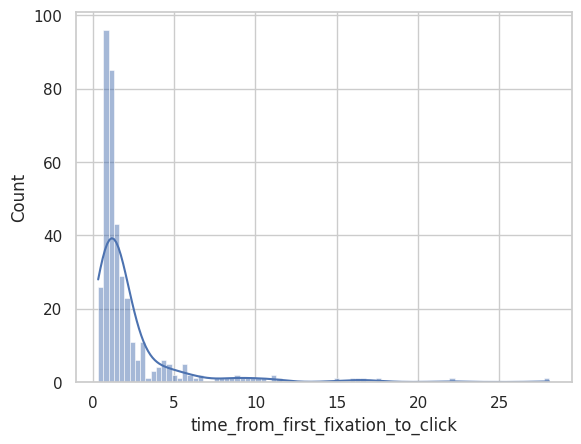

In [ ]:
sns.histplot(df_filtered["time_from_first_fixation_to_click"], kde=True)

In [ ]:
# Import libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pandas as pd
import arviz as az


# Convert variables to categorical as needed
df_filtered["group_O"] = df_filtered["group_O"].astype("category")
df_filtered["pattern_bright"] = df_filtered["pattern_bright"].astype("category")
df_filtered["user_id"] = df_filtered["user_id"].astype("category")
df_filtered["trial_order"] = df_filtered["trial_order"].astype(int)

# Drop rows with NaN values in 'time_from_first_fixation_to_click'
df_model = df_filtered.dropna(subset=['time_from_first_fixation_to_click']).copy()

# Fit model on early trials
model_DT = bmb.Model(
    "time_from_first_fixation_to_click ~ group_O + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_model,
    family="weibull"
)
results_DT = model_DT.fit(draws=2000,
    tune=2000,
    chains=4,
    target_accept=0.99)


In [ ]:
az.summary(results_DT)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|user_id[301],-0.455,0.225,-0.873,-0.033,0.004,0.003,3359.0,4200.0,1.0
1|user_id[302],0.026,0.217,-0.373,0.434,0.004,0.002,3351.0,4277.0,1.0
1|user_id[303],-0.124,0.224,-0.544,0.301,0.004,0.003,2781.0,3533.0,1.0
1|user_id[304],0.295,0.217,-0.099,0.709,0.004,0.003,3024.0,3812.0,1.0
1|user_id[305],-0.017,0.343,-0.658,0.624,0.007,0.006,2418.0,3616.0,1.0
1|user_id[306],-0.552,0.230,-0.990,-0.127,0.004,0.003,3273.0,4214.0,1.0
1|user_id[307],0.593,0.221,0.182,1.018,0.004,0.003,3001.0,3935.0,1.0
1|user_id[308],0.325,0.227,-0.095,0.752,0.004,0.003,2932.0,4266.0,1.0
1|user_id[309],0.029,0.223,-0.377,0.458,0.004,0.003,2706.0,3665.0,1.0
1|user_id[310],-0.138,0.221,-0.553,0.280,0.004,0.003,3216.0,4234.0,1.0


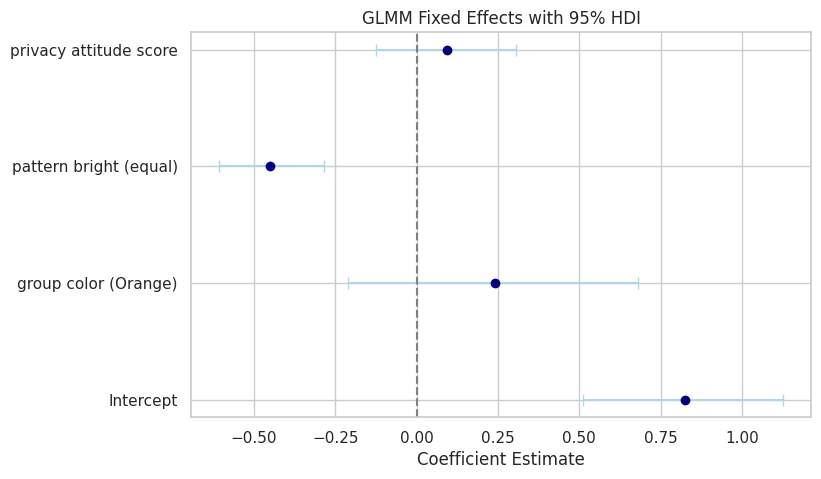

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group color (Orange)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [0.826, 0.241, -0.451, 0.092],
    "Lower": [0.512, -0.212, -0.607, -0.124],
    "Upper": [1.126, 0.681, -0.286, 0.306]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

reject fixation time ratio

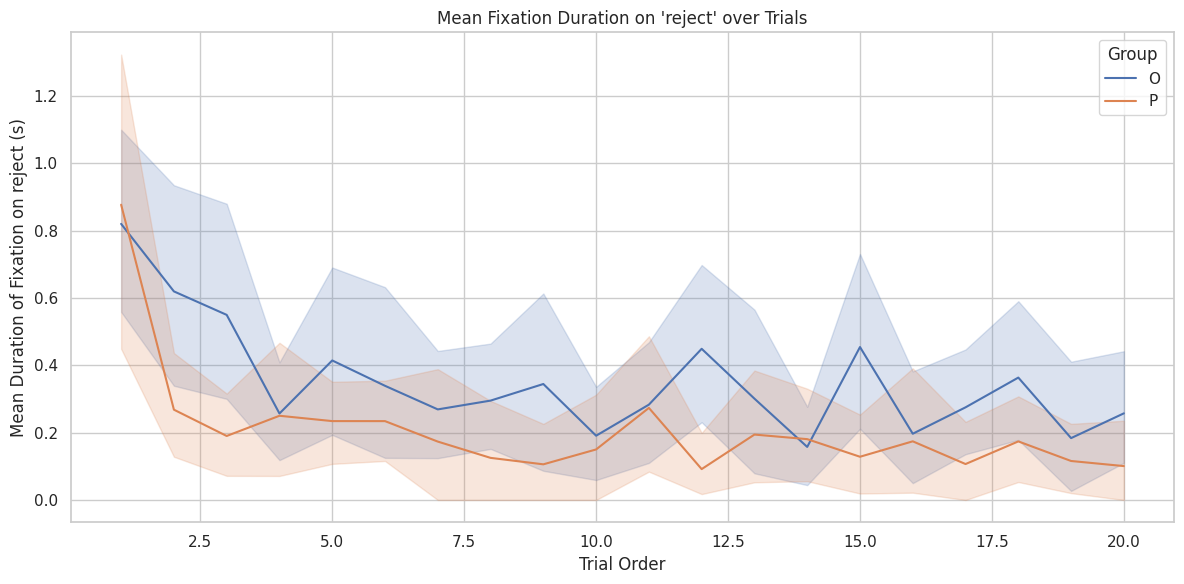

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Plot: Lineplot of fixation time on reject over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='trial_order', y='duration_fixation_reject', hue='group', estimator='mean')
plt.title("Mean Fixation Duration on 'reject' over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Duration of Fixation on reject (s)")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

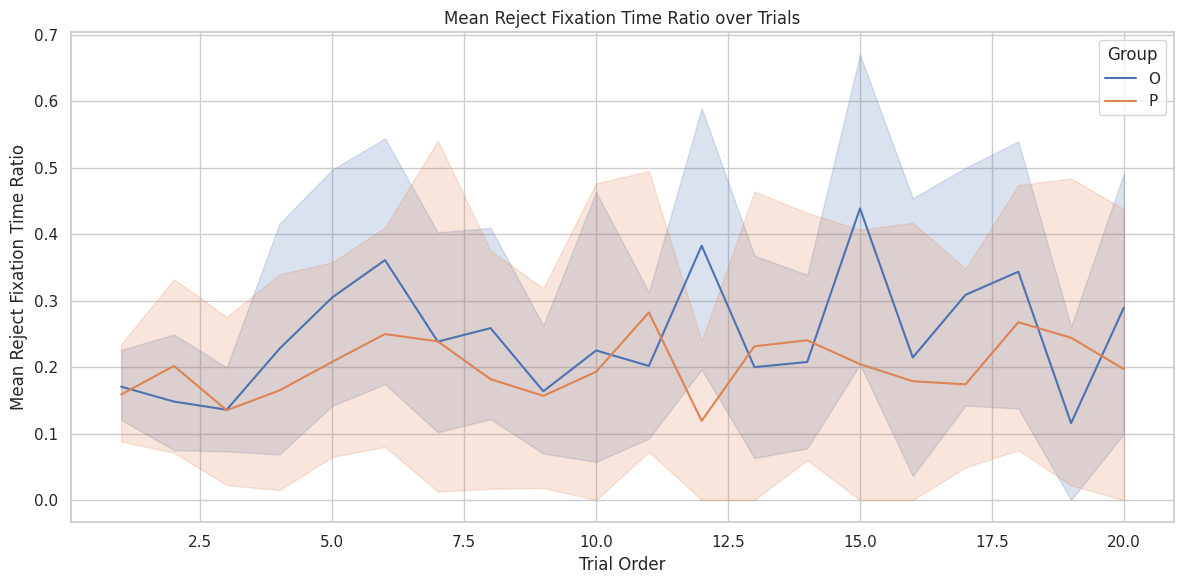

In [ ]:
# Calculate the fixation proportion
df_filtered['reject_ratio'] = df_filtered['duration_fixation_reject'] / df_filtered['duration_fixation_cookie']

# Set seaborn style
sns.set(style="whitegrid")

# Plot: Lineplot of fixation time on reject fixation time ratio over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='trial_order', y='reject_ratio', hue='group', estimator='mean')
plt.title("Mean Reject Fixation Time Ratio over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Reject Fixation Time Ratio")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

<Axes: ylabel='reject_ratio'>

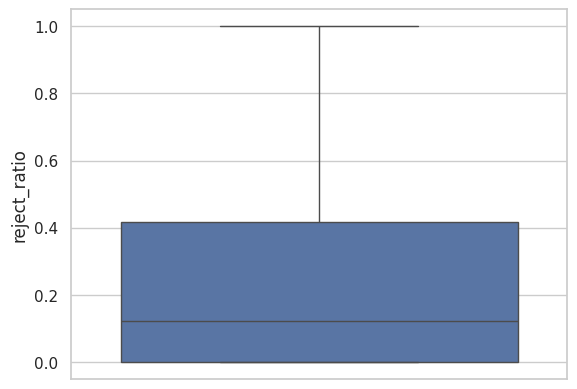

In [ ]:
sns.boxplot(df_filtered["reject_ratio"])

<Axes: xlabel='reject_ratio', ylabel='Count'>

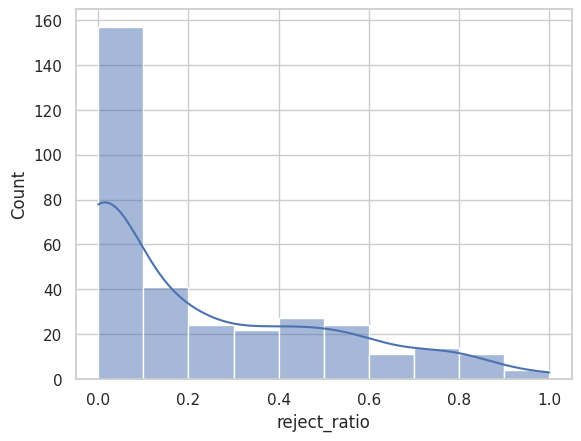

In [ ]:
sns.histplot(df_filtered["reject_ratio"], kde=True)

In [ ]:
# Import libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pandas as pd
import arviz as az
from pandas.api.types import CategoricalDtype

# Calculate the fixation proportion
df_filtered['reject_ratio'] = df_filtered['duration_fixation_reject'] / df_filtered['duration_fixation_cookie']
df_filtered = df_filtered.copy()

# Convert variables to categorical as needed
df_filtered["group_O"] = df_filtered["group_O"].astype("category")
df_filtered["pattern_bright"] = df_filtered["pattern_bright"].astype("category")
df_filtered["user_id"] = df_filtered["user_id"].astype("category")
df_filtered["trial_order"] = df_filtered["trial_order"].astype(int)

model_rftr = bmb.Model(
    "reject_ratio ~ group_O + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_filtered,
    family="t"
)

# Fit the model with adjusted sampling parameters
results_rftr = model_rftr.fit(
    draws=2000,
    tune=2000,
    chains=3,
    cores=3,
    target_accept=0.999,
)

In [ ]:
import arviz as az
az.summary(results_rftr)

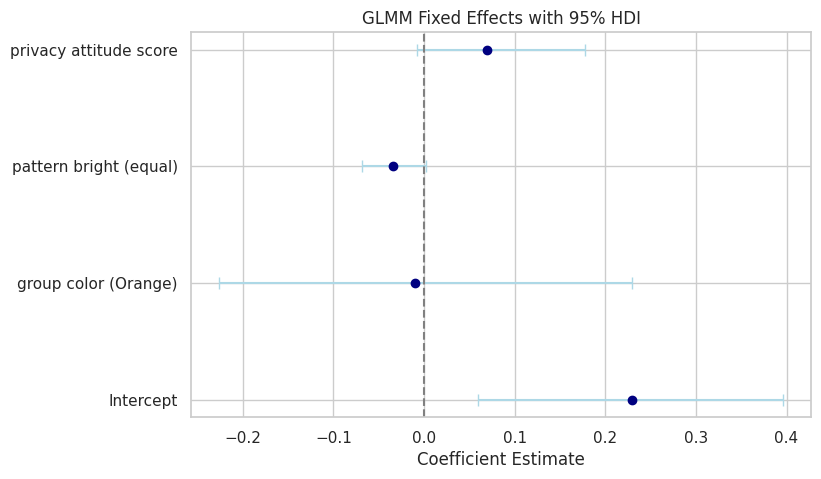

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group color (Orange)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [0.230, -0.010, -0.034, 0.070],
    "Lower": [0.059, -0.226, -0.069, -0.008],
    "Upper": [0.396, 0.230, 0.002, 0.178]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

accept fixation time ratio

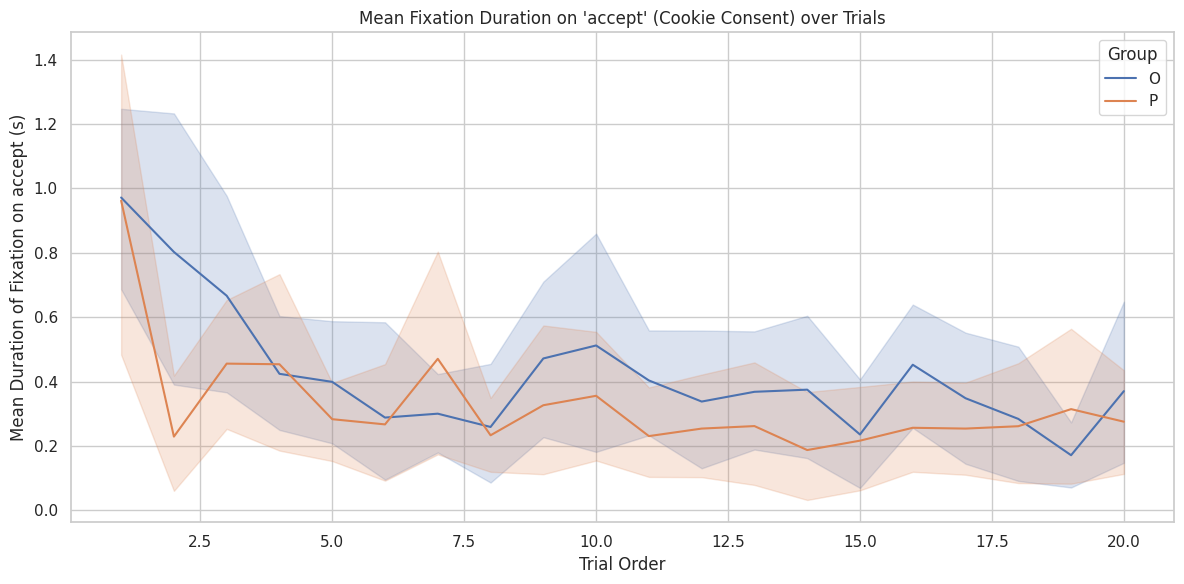

In [ ]:
# Plot: Lineplot of fixation time on accept over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='trial_order', y='duration_fixation_accept', hue='group', estimator='mean')
plt.title("Mean Fixation Duration on 'accept' (Cookie Consent) over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Duration of Fixation on accept (s)")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

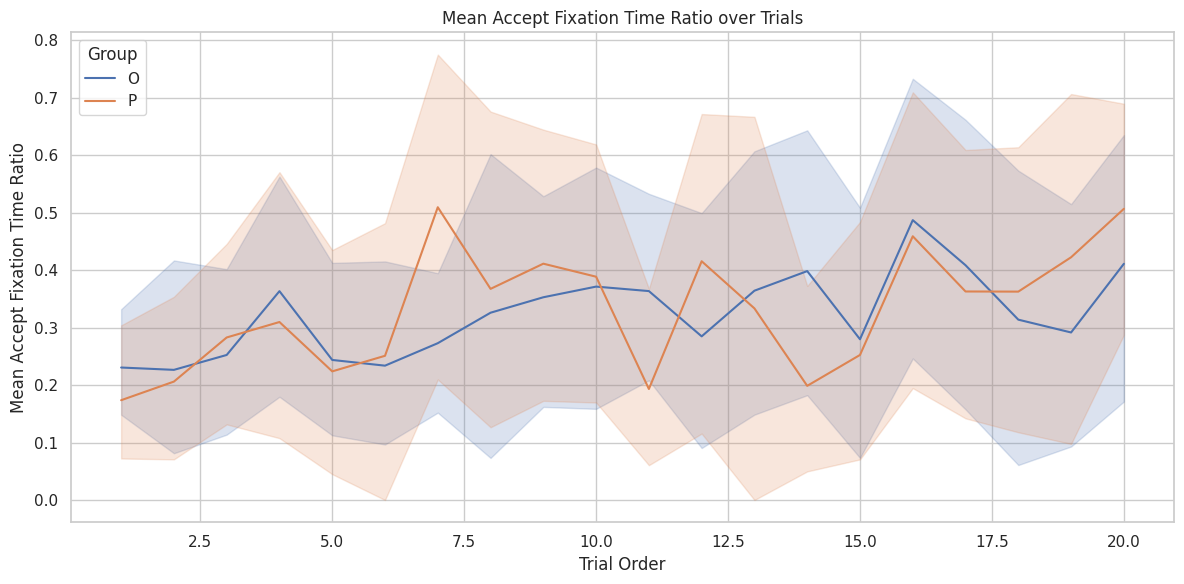

In [ ]:
# Calculate the fixation proportion
df_filtered['accept_ratio'] = df_filtered['duration_fixation_accept'] / df_filtered['duration_fixation_cookie']

# Plot: Lineplot of accept fixation time ratio over trial order (learning/fatigue)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='trial_order', y='accept_ratio', hue='group', estimator='mean')
plt.title("Mean Accept Fixation Time Ratio over Trials")
plt.xlabel("Trial Order")
plt.ylabel("Mean Accept Fixation Time Ratio")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

<Axes: ylabel='accept_ratio'>

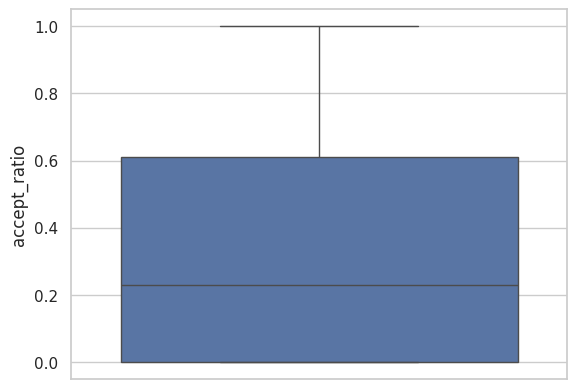

In [ ]:
sns.boxplot(df_filtered["accept_ratio"])

<Axes: xlabel='accept_ratio', ylabel='Count'>

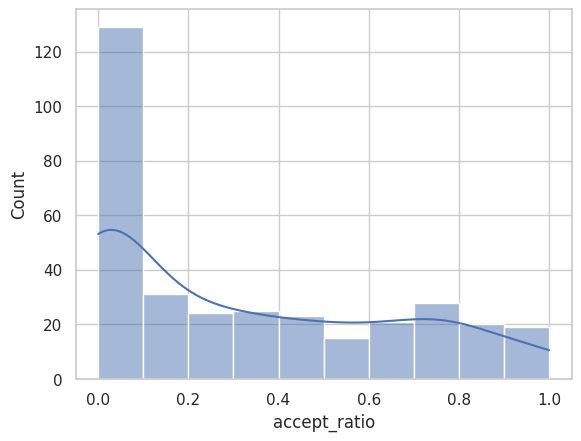

In [ ]:
sns.histplot(df_filtered["accept_ratio"], kde=True)

In [ ]:
import bambi as bmb
import arviz as az

# Calculate the fixation proportion
df_filtered['accept_ratio'] = df_filtered['duration_fixation_accept'] / df_filtered['duration_fixation_cookie']

model_aftr = bmb.Model(
    "accept_ratio ~ group_O + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_filtered,
    family="t"
)
# Fit the model with adjusted sampling parameters
results_aftr2 = model_aftr.fit(
    draws=2000,
    tune=2000,
    chains=3,
    cores=3,
    target_accept=0.999,
)

In [ ]:
import arviz as az
az.summary(results_aftr2)

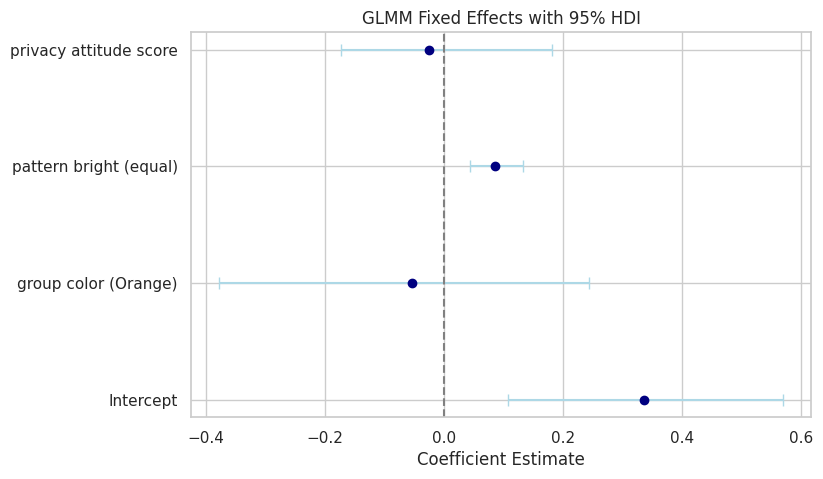

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group color (Orange)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [0.335, -0.054, 0.086, -0.025],
    "Lower": [0.107, -0.378, 0.043, -0.174],
    "Upper": [0.569, 0.243, 0.133, 0.181]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()

acceptance rate

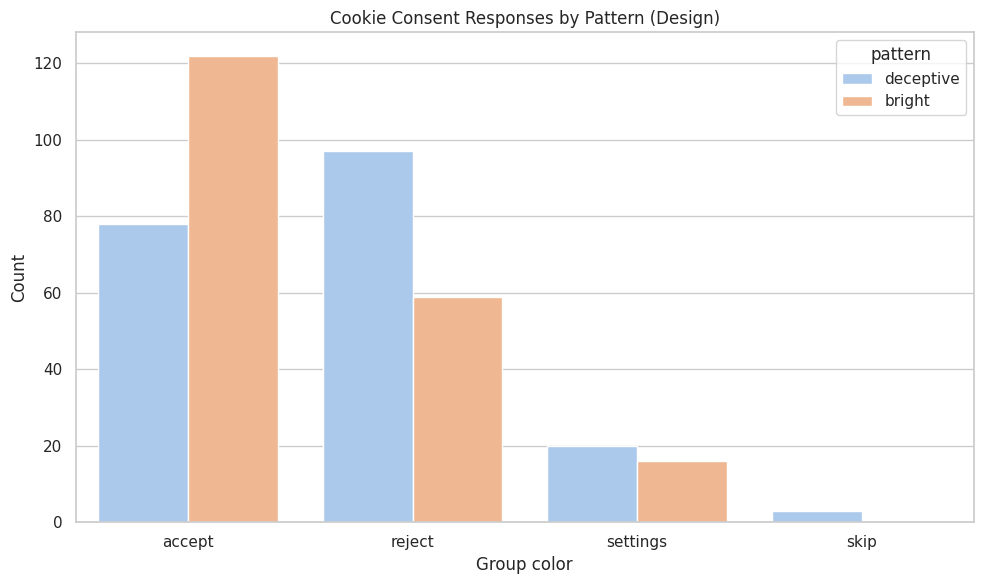

In [ ]:
# Plot: Bar plot of response types by group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='result', hue='pattern', palette='pastel')
plt.title("Cookie Consent Responses by Pattern (Design)")
plt.xlabel("Group color")
plt.ylabel("Count")
plt.legend(title='pattern')
plt.tight_layout()
plt.show()

In [ ]:
# Import libraries after reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
import pandas as pd
import arviz as az

df_filtered = df_filtered.copy()

# Convert variables to categorical as needed
df_filtered["group_O"] = df_filtered["group_O"].astype("category")
df_filtered["pattern_bright"] = df_filtered["pattern_bright"].astype("category")
df_filtered["user_id"] = df_filtered["user_id"].astype("category")
df_filtered["trial_order"] = df_filtered["trial_order"].astype(int)

# Fit logistic mixed-effects model on early trials
model_AR = bmb.Model(
    "accepted ~ group_O + pattern_bright + privacy_attitude_score + (1|user_id)",
    data=df_filtered,
    family="bernoulli"
)
results_AR = model_AR.fit(draws=2000,
    tune=2000,
    chains=4,
    target_accept=0.99)


In [ ]:
az.summary(results_AR)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|user_id[301],7.894,3.534,2.392,14.719,0.054,0.057,4797.0,4397.0,1.0
1|user_id[302],0.046,1.342,-2.489,2.583,0.030,0.016,2010.0,3722.0,1.0
1|user_id[303],7.985,3.440,2.238,14.498,0.054,0.056,4483.0,4367.0,1.0
1|user_id[304],-3.645,1.713,-6.949,-0.508,0.033,0.021,2689.0,4219.0,1.0
1|user_id[305],-8.628,3.541,-15.143,-2.234,0.050,0.044,5192.0,4968.0,1.0
1|user_id[306],2.898,1.435,0.205,5.617,0.030,0.016,2225.0,4128.0,1.0
1|user_id[307],-7.647,3.640,-14.798,-1.951,0.056,0.064,4882.0,4684.0,1.0
1|user_id[308],1.788,1.480,-0.938,4.590,0.034,0.018,1921.0,3519.0,1.0
1|user_id[309],-7.718,3.625,-14.976,-1.752,0.056,0.056,4670.0,4004.0,1.0
1|user_id[310],0.528,1.369,-1.931,3.242,0.031,0.017,1942.0,3587.0,1.0


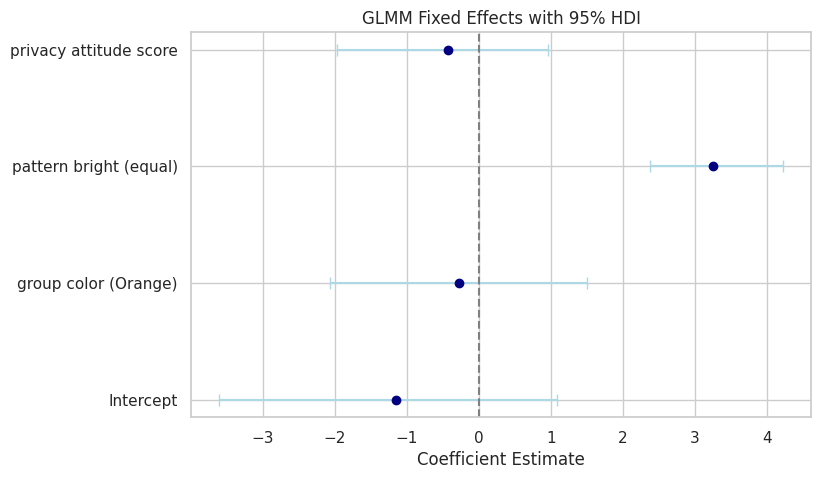

In [ ]:
# Fixed effects plot
fixed_effects_data = {
    "Effect": ["Intercept", "group color (Orange)", "pattern bright (equal)", "privacy attitude score"],
    "Coef": [-1.144, -0.279, 3.254, -0.423],
    "Lower": [-3.604, -2.062, 2.379, -1.965],
    "Upper": [1.083, 1.506, 4.220, 0.958]
}
fixed_df = pd.DataFrame(fixed_effects_data)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
plt.errorbar(fixed_df["Coef"], fixed_df["Effect"],
             xerr=[fixed_df["Coef"] - fixed_df["Lower"], fixed_df["Upper"] - fixed_df["Coef"]],
             fmt="o", color="navy", ecolor="lightblue", capsize=4)
plt.axvline(0, color="grey", linestyle="--")
plt.xlabel("Coefficient Estimate")
plt.title("GLMM Fixed Effects with 95% HDI")
plt.show()